In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.neighbors import BallTree
import numpy as np

### Pearson correlation, T-Test, Standard Deviation

#### Number unemployed in relation to number of crimes by zip code

In [ ]:
crime_housing_data = pd.read_csv('data/crime-housing-austin-2015.csv')
unemployment_and_zip_code = crime_housing_data[['Unemployment', 'Zip_Code_Crime']]

# remove na items
unemployment_and_zip_code = unemployment_and_zip_code.dropna()

# convert zip code to integer
unemployment_and_zip_code.Zip_Code_Crime = unemployment_and_zip_code.Zip_Code_Crime.astype('int')

# convert percentage to float
unemployment_and_zip_code.Unemployment = unemployment_and_zip_code.Unemployment.astype('string')
unemployment_and_zip_code.Unemployment = unemployment_and_zip_code.Unemployment.str.strip('%').astype('float')
unemployment_and_zip_code.Unemployment = unemployment_and_zip_code.Unemployment / 100.0

# sort in ascending order by zip code
unemployment_and_zip_code.sort_values(['Unemployment'], ascending=False, inplace=True)

# group matching zip codes and unemployment percentage
unemployment_and_zip_code = unemployment_and_zip_code.groupby('Zip_Code_Crime').agg({'Unemployment': ['mean', 'count']}).reset_index()

# update column names
unemployment_and_zip_code.columns=['Zip Code','Percentage Unemployed', 'Num Crimes at Zip Code']


In [ ]:
austin_zip_codes = pd.read_csv('data/AustinZipCodes.csv')

# get zip code and population
zip_code_and_population = austin_zip_codes[['Zip Code', 'Population']]

# convert population to int
zip_code_and_population.Population = zip_code_and_population.Population.astype('string')
zip_code_and_population.Population = zip_code_and_population.Population.replace(',', '', regex=True).astype('int')

# using previous data, combine dataframe on zip code
zip_code_unemployment_population = pd.merge(unemployment_and_zip_code, zip_code_and_population, on='Zip Code')


In [ ]:
# add new column containing number of people unemployment
zip_code_unemployment_population['Approx Num Unemployed'] = round(zip_code_unemployment_population.Population * zip_code_unemployment_population['Percentage Unemployed']).astype('int')
zip_code_unemployment_population

# create scatter plot
ax = sns.regplot(x='Approx Num Unemployed', y='Num Crimes at Zip Code', data=zip_code_unemployment_population)
ax.set(title='Num Unemployed in Relation to Num Crimes at Zip Code')
ax.set_ylabel("Number of Crimes at Zip Code")
ax.set_xlabel("Approximate Number of People Unemployed at Zip Code")

#### Pearson Correlation

In [ ]:
# number of people unemployed in releation to the number of crimes in an area
(r,p) = stats.pearsonr(zip_code_unemployment_population['Approx Num Unemployed'], zip_code_unemployment_population['Num Crimes at Zip Code'])
print('r =', r, 'p =', p)

#### T Test

In [ ]:
# TTest for the correlation between number of people unemployed in releation to the number of crimes in an area 
display(stats.ttest_ind(zip_code_unemployment_population['Approx Num Unemployed'], zip_code_unemployment_population['Num Crimes at Zip Code']))

#### Standard Deviation

In [ ]:
# performing standard deviation
display((zip_code_unemployment_population).std())

### Scatter Plot
#### The average per capita income of the area

In [ ]:
# reading the csv data
crime_housing_data = pd.read_csv('data/crime-housing-austin-2015.csv')

# removing un-used columns
zip_code_income = crime_housing_data[['Zip_Code_Crime','Medianhouseholdincome']]

# remove na items
zip_code_income = zip_code_income.dropna()

zip_code_income['Medianhouseholdincome'] = zip_code_income['Medianhouseholdincome'].str.replace('$', '').astype('float')

# convert zip code to string
zip_code_income.Zip_Code_Crime = zip_code_income.Zip_Code_Crime.astype('string')

# group by matching zip code
zip_code_income = zip_code_income.groupby('Zip_Code_Crime').agg({'Medianhouseholdincome': 'mean'}).reset_index()

zip_code_income.columns=['Zip Code','Medianhouseholdincome']

# considering sample of data for the plot
fraction = 0.2
sampled_data_zip_code_income = zip_code_income.sample(frac=fraction)

# create scatter plot for median household income at a particular area
ax = sns.scatterplot(x='Zip Code', y='Medianhouseholdincome', data=sampled_data_zip_code_income)
ax.set(title='Total medianincome at Zip Code')
ax.set_ylabel("Medianhouseholdincome")
ax.set_xlabel("Zip Code")


### Total crime rate in relation to median income

/var/folders/lf/dk8xthpn26dbb2nwpwwl533r0000gn/T/ipykernel_3545/926005048.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  zip_code_offense['Medianhouseholdincome'] = zip_code_offense['Medianhouseholdincome'].str.replace('$', '').astype('float')


Text(0.5, 0, 'Median Income')

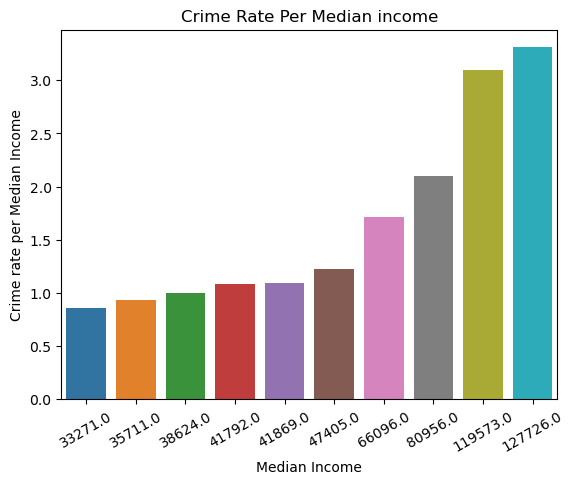

In [104]:
# reading the csv data
crime_housing_data = pd.read_csv('data/crime-housing-austin-2015.csv')
austin_zip_codes = pd.read_csv('data/AustinZipCodes.csv')

# removing un-used columns
zip_code_offense = crime_housing_data[['Zip_Code_Crime','Medianhouseholdincome']]
zip_code_and_population = austin_zip_codes[['Zip Code', 'Population']]

# remove na items
zip_code_offense = zip_code_offense.dropna()

zip_code_offense['Medianhouseholdincome'] = zip_code_offense['Medianhouseholdincome'].str.replace('$', '').astype('float')

# convert zip code to integer
zip_code_offense.Zip_Code_Crime = zip_code_offense.Zip_Code_Crime.astype('int')

# group by matching zip code
zip_code_offense = zip_code_offense.groupby('Zip_Code_Crime').agg({'Medianhouseholdincome': 'mean'}).reset_index()

zip_code_offense.columns=['Zip Code','Medianhouseholdincome']

# using previous data, merge on zip code
zip_code_population_count = pd.merge(zip_code_offense, zip_code_and_population, on='Zip Code')

# convert population to int
zip_code_population_count.Population = zip_code_population_count.Population.astype('string')
zip_code_population_count.Population = zip_code_population_count.Population.replace(',', '', regex=True).astype('int')

# convert zip code to integer
zip_code_population_count['Zip Code'] = zip_code_population_count['Zip Code'].astype('int')

# calculate the percapita income
# zip_code_population_count['Percapita income'] = round(zip_code_population_count['Medianhouseholdincome'] / zip_code_population_count['Population']).astype('int')

# find the total no of crimes
total_crimes = len(crime_housing_data)

# Calculate the crime rate per median income
zip_code_population_count['crime_rate_per_median_income'] = round(zip_code_population_count['Medianhouseholdincome'] / total_crimes, 2)

fraction = 0.3
sampled_data_zip_code = zip_code_population_count.sample(frac=fraction)

# bar chart between Zip code and crime rate per capita income
ax = sns.barplot(y='crime_rate_per_median_income', x='Medianhouseholdincome', data=sampled_data_zip_code)
ax.set(title='Crime Rate Per Median income')
ax.tick_params(axis='x', rotation=30)
ax.set_ylabel("Crime rate per Median Income")
ax.set_xlabel("Median Income")


### Scatter Plot
#### Number of crimes committed within same area

In [ ]:
crime_housing_data = pd.read_csv('data/crime-housing-austin-2015.csv')
zip_code_offense = crime_housing_data[['Zip_Code_Crime']]

# remove na items
zip_code_offense = zip_code_offense.dropna()

# convert zip code to integer
zip_code_offense.Zip_Code_Crime = zip_code_offense.Zip_Code_Crime.astype('int')

# count zip number of times zip code appears
zip_code_offense['count'] = zip_code_offense.groupby('Zip_Code_Crime')['Zip_Code_Crime'].transform('count')

# group by matching zip code
zip_code_offense = zip_code_offense.groupby('Zip_Code_Crime').agg({'count': 'mean'}).reset_index()

# convert count to int
zip_code_offense['count'] = zip_code_offense['count'].astype('int')

zip_code_offense.columns=['Zip Code','Num Crimes at Zip Code']

In [ ]:
austin_zip_codes = pd.read_csv('data/AustinZipCodes.csv')

zip_code_location = austin_zip_codes[['Zip Code', 'Location']]

# remove na
zip_code_location.dropna(inplace = True)

# create columns for lon_x lat_y
# new data frame with split value columns for lon_x, lat_y
lon_lat = zip_code_location["Location"].str.split(",", n = 1, expand = True)
 
# making separate lon x column from new data frame
zip_code_location["Longitude"]= lon_lat[0].astype('float')
 
# making separate lat y column from new data frame
zip_code_location["Latitude"]= lon_lat[1].astype('float')

In [ ]:
# find nearest neighbors
tree = BallTree(np.deg2rad(zip_code_location[['Latitude', 'Longitude']].values), metric='haversine')

distances, indices = tree.query(zip_code_location[['Latitude', 'Longitude']].values, k=1)
zip_code_location['Shortest Distance'] = distances
zip_code_location['Closest Location'] = indices

In [ ]:
# choose rows that are closest to the location at index 38, same general area
zip_code_general_location = zip_code_location[zip_code_location['Closest Location'] == 38]
# zip_code_closest_to_thirty_eight_index

# merge with zip code offence
general_location_crime_count = pd.merge(zip_code_offense, zip_code_general_location, on='Zip Code')
general_location_crime_count

# Crimes commited closest to the location 30.122470, -97.746210
# Haversine distance from location
# create scatter plot
ax = sns.scatterplot(x='Shortest Distance', y='Num Crimes at Zip Code', data=general_location_crime_count)
ax.set(title='Number of Crimes Commited Within Neighboring Locations')
ax.set_ylabel("Number of Crimes Committed")
ax.set_xlabel("Haversine Distance")